Designing a Kohonen self organizing map (SOM), which gives as an output some shades of color mapped over
100 by 100 grid of neurons. The training input of the SOM are 24 colors (use shades of red, green, blue, with some
yellow, teal and pink) which you can chose from the "RGB Color Table: Basic Colors"

Using a time varying learning rate 𝜶(𝒌) = 𝜶𝟎𝒆𝒙𝒑(−𝒌
𝑻
) where k is the current training epoch (starts with
epoch 0), 𝜶𝟎 = 𝟎. 𝟖 , and T is the Total number of training epochs equal to 1000.Initial weights are randomized.

In [2]:
#Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Selecting the input data of RGB clours

Input_data = [[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],[128,0,0],[0,128,128],[128,0,128],[0,0,128],[165,42,42],[255,215,0],[127,255,0],[154,205,50],[173,255,47],[138,43,226],[148,0,211],[25,25,112],[0,0,139],[65,105,225],[178,34,34],[255,99,71],[139,0,0],[220,20,60]]

# Color code selected in order
'''
 	Red,
    Lime,
    blue,
    Yellow,
    Cyan / Aqua,
    Magenta / Fuchsia,
    Maroon,
    teal,
    purple,
    navy,
    brown,
    gold,
    chartreuse,
    yellow green,
    green yellow,
    blue violet,
    dark violet,
    midnight blue,
    light salmon,
    royal blue,
    firebrick,
    tomato,
    dark read,
    crimson.
'''

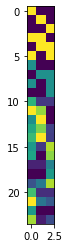

In [8]:
## Normalizing Data and converting it in the ranhe of 0 to 1 instead of 0 to 255
Input_data = np.asarray(Input_data)
Input_data = Input_data/255
plt.imshow(Input_data)

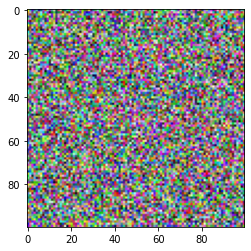

In [9]:
#Initializing the weights randomly
weight_matrix= np.random.randint(0,255,size = (100,100,3))
weight_matrix = weight_matrix/255
plt.imshow(weight_matrix)

The SOM learning algorithm is relatively straightforward. It consists of initializing the weights, iterating over the input data, finding the "winning" neuron for each input, and adjusting weights based on the location of that "winning" neuron.

In [12]:
class KSOM(object):
    """
    Implementation of Kohonen Self Organising Map for given 24 shades of red, green, blue, with some yellow, teal and pink input of colors
    - 10000 Neurons are placed in 100 x 100 Grid as mentioned in the problem statement 
    """
    def __init__(self,sigma):
        #Initialising the weights and sigma
        np.random.seed(42)
        # Sigma value that affects the radius of Neighbourhood of the winning node
        self.sigma=sigma
        # Initialize weights of the 100 x 100 x 3 connections randomly
        self.weight_matrix= np.random.randint(0,255,size = (100,100,3))
        self.weight_matrix = self.weight_matrix/255    

    def get_weight_matrix(self):
        return self.weight_matrix
    
    #Identifying the neighbor neuronss
    def Neighbourhood_func(self,distance,current_epoch):
        return np.exp(-distance**2/(2*self.sigma_func(current_epoch)**2))
    
    #Updating the learning rate since it is decaying 
    def learning_rate_func(self,current_epoch):
        return 0.8*np.exp(-current_epoch/self.epochs)
    
    # Updating the Radius parameter that affects the area of neighbouhood
    def sigma_func(self,current_epoch): 
        return self.sigma*np.exp(-current_epoch/self.epochs)
     
    """
        The weights are initialized randomly.Now, this function updates the weights based on the following steps,
         1: Iterating over the inputs and obtain the distance between selected one input and all nodes. Minimun Euclidian distance of the node is found.
         2: Now, Distance of all other nodes from the winning node index is found which is the 
        parameter of Neighbourhood function which updates the weight matrix.The nodes that closer to winning node are updated more and it decreases as the distance increases.
         3: Repeat for given no of epochs with varying sigma until converges.
        """    
    def update_weight_matrix(self,Input_data,epochs):
        fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))
        count =0
        # Total no of epochs
        self.epochs=epochs 
        for current_epoch in range(self.epochs+1):
            new_learning_rate = self.learning_rate_func(current_epoch) # updated learning rate each epoch
            for index,inputs in enumerate(Input_data):
                # Creating a 100 x 100 grid which contains indicies as its values
                grid= np.indices((100,100)) 
                # Findiing the Euclidean distance between input and all other neurons
                Euclidian_distance=np.linalg.norm(inputs - self.weight_matrix,axis=2)**2
                minimal_distance=np.amin(Euclidian_distance)
                # Computing the index of the node that corresponds to minimum distance
                winning_index=np.where(Euclidian_distance==minimal_distance)
                
                # Distance of the indcies from the winning_index
                grid[0]=winning_index[0]-grid[0] 
                grid[1]=winning_index[1]-grid[1]
                d=np.linalg.norm(grid, axis=0)
                
                #Updating the Neighbour neurons weights 
                self.weight_matrix = self.weight_matrix + (new_learning_rate)*np.dstack([self.Neighbourhood_func(d,current_epoch)]*3)*(inputs - self.weight_matrix)               
    
            if (current_epoch == 20 or current_epoch==40 or current_epoch==100 or current_epoch==1000):
                plt.sca(axs[count])
                plt.title("Epoch "+str(current_epoch) + "& Sigma "+ str(self.sigma))
                plt.imshow(self.weight_matrix)
                count = count + 1
        plt.show()

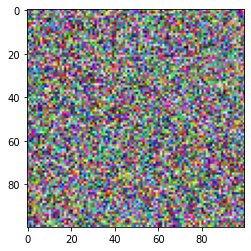

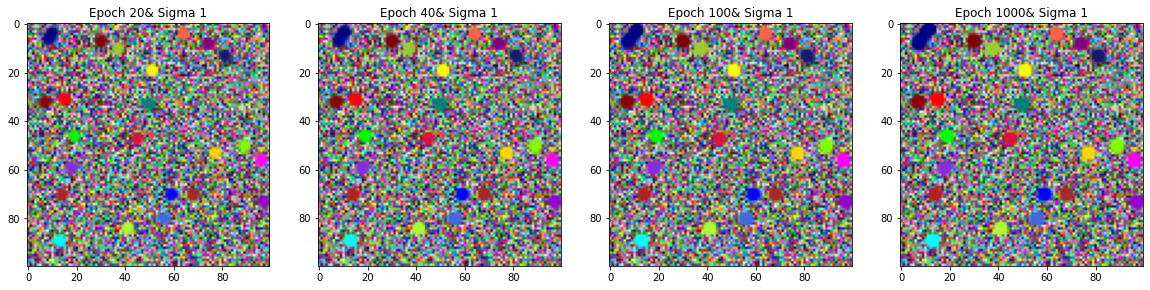

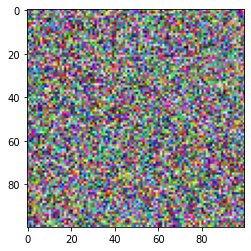

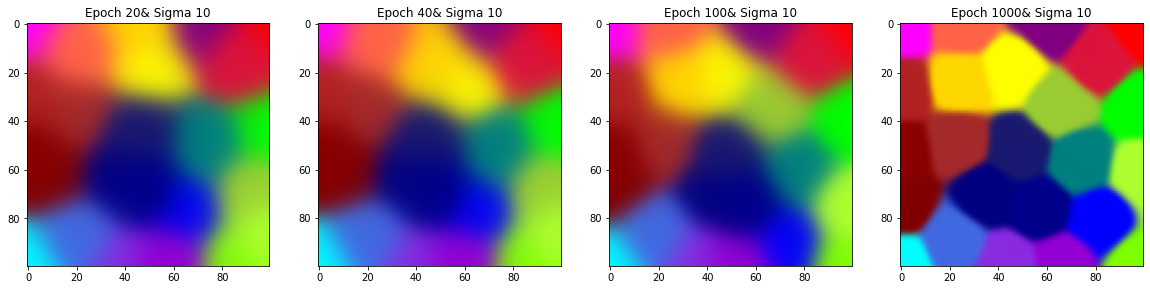

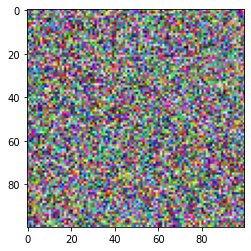

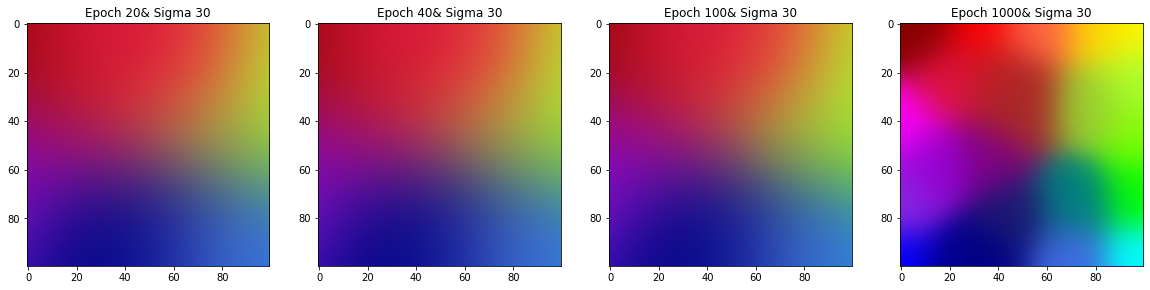

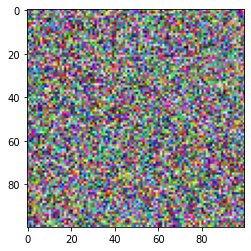

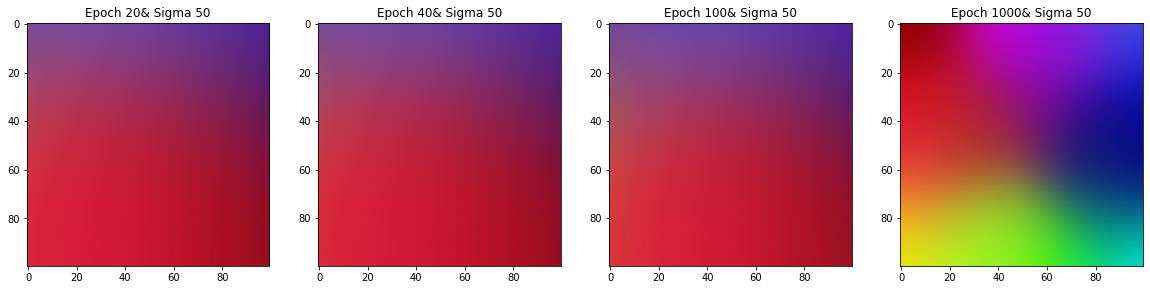

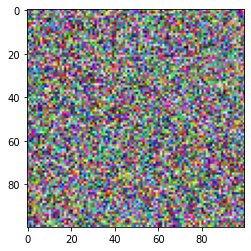

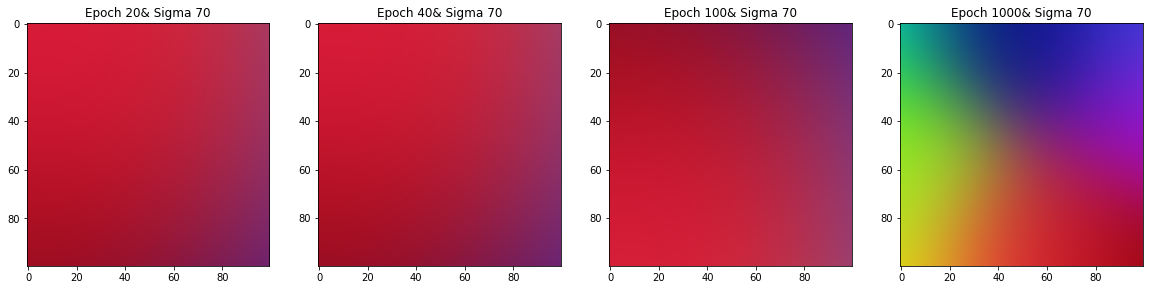

In [14]:

sigma = [1,10,30,50,70]
epochs =1000

for sig in sigma:
    som = KSOM(sig)
    plt.imshow(som.get_weight_matrix())
    plt.show()
    som.update_weight_matrix(Input_data,epochs)

So in KSOM, Neighbourhood function and learning rate are dependant on current iteration of epoch. As the epochs increases, the neighbour hood radius and learning rate decreases. So, the colors merge into each other.

Initially, when  the spread is small,  the radius is small and the close proximity neighbourhood neurons are affected. So the colours are displayed as small bubbles.

When  𝜎 increases, radius increases, so the neighbourhood increases , so  the color merges.
